## Correlation analysis : 상관분석
아래 그림과 같이 두 변인 x,y에 대해 x가 변화할때 y가 변화되면 x,y는 상관관계에 있다고 한다.

![title](img/correlation_analysis.png)

In [1]:
critics = {
    'A': {
        'Taxi Driver': 2.5,
        'South Castle': 3.5,
        'King''s man': 3.0,
        'Crime City': 3.5,
        'I can speak': 2.5,
        'The Night Listener': 3.0,
    },
    'B': {
        'Taxi Driver': 1.0,
        'South Castle': 4.5,
        'King''s man': 0.5,
        'Crime City': 1.5,
        'I can speak': 4.5,
        'The Night Listener': 5.0,
    },
    'C': {
        'Taxi Driver': 3.0,
        'South Castle': 3.5,
        'King''s man': 1.5,
        'Crime City': 5.0,
        'The Night Listener': 3.0,
        'I can speak': 3.5,
    },
    'D': {
        'Taxi Driver': 2.5,
        'South Castle': 3.0,
        'Crime City': 3.5,
        'The Night Listener': 4.0,
    },
    'E': {
        'South Castle': 3.5,
        'King''s man': 3.0,
        'The Night Listener': 4.5,
        'Crime City': 4.0,
        'I can speak': 2.5,
    },
    'F': {
        'Taxi Driver': 3.0,
        'South Castle': 4.0,
        'King''s man': 2.0,
        'Crime City': 3.0,
        'The Night Listener': 3.5,
        'I can speak': 2.0,
    },
    'G': {
        'Taxi Driver': 3.0,
        'South Castle': 4.0,
        'The Night Listener': 3.0,
        'Crime City': 5.0,
        'I can speak': 3.5,
    },
    'H': {
        'South Castle': 4.5, 
        'I can speak': 1.0,
        'Crime City': 4.0
    },
}


In [2]:
# critics data 이용해 scatter plot 그리기
import matplotlib.pyplot as plt
def drawGraph(data, name1, name2):
    plt.figure(figsize=(14,8)) # plot 크기설정
    
    # plot 좌표를 위한 list 선언
    li = []
    li2 = []
    
    for i in critics[name1]: # i = 키 값
        if i in data[name2]: # 같은 영화를 평가했을때만
            li.append(critics[name1][i]) # name1의 평점 li[]에 추가
            li2.append(critics[name2][i]) # name2의 평점 li2[]에 추가
            plt.text(critics[name1][i],critics[name2][i],i) # 영화 제목 text 찍기
            
    plt.plot(li,li2,'ro') #plot그리기
    
    #각 축의 크기 설정 (0에서 6까지)
    plt.axis([0,6,0,6])
 
    # x축과 y축 이름 설정
    plt.xlabel(name1)
    plt.ylabel(name2)
 
    # 그리기
    plt.show()

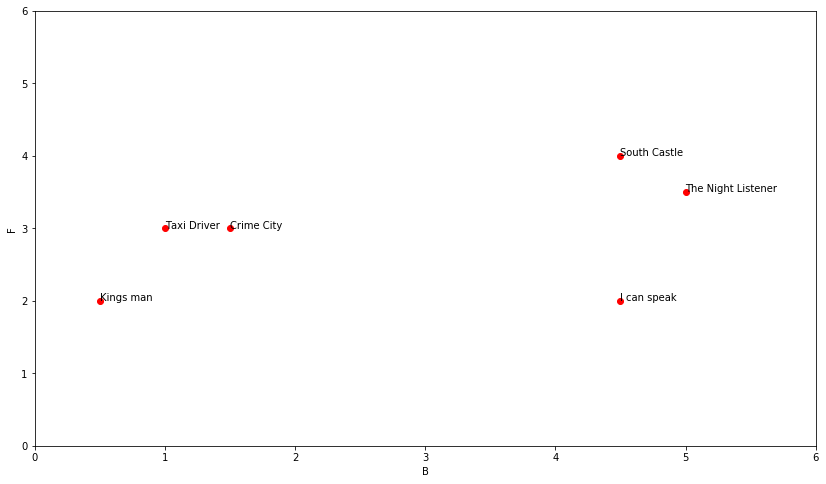

In [3]:
drawGraph(critics,'B','F')

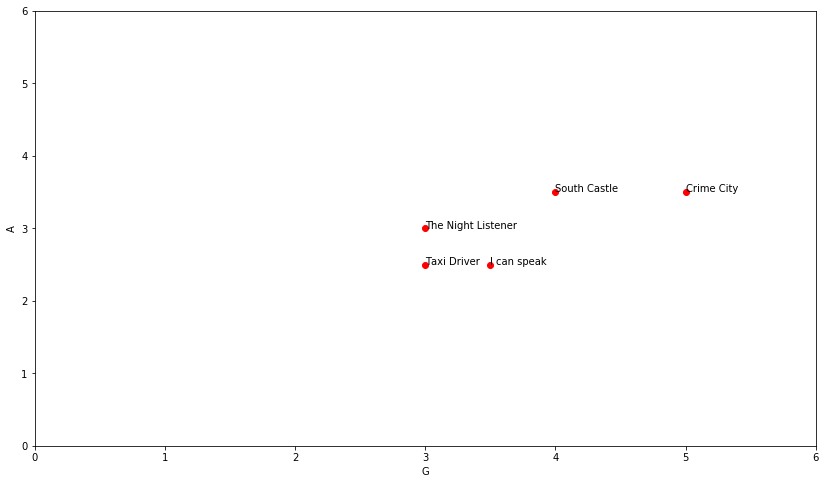

In [4]:
drawGraph(critics,'G','A')

## 피어슨 상관계수
피어슨 상관계수는 값이 -1부터 1까지 도출되며, 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계를 가진다.

![title](img/pearson.png)

In [5]:
# 피어슨 상관계수 구하기
from math import sqrt

def sim_pearson(data, name1, name2):
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #영화 개수
    
    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 영화를 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    
    return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))

In [6]:
sim_pearson(critics,'B','F')

0.41791069697885247

In [7]:
sim_pearson(critics,'G','A')

0.7470178808339965

In [8]:
def top_match(data, name, index=3, sim_function=sim_pearson):
    li=[]
    for i in data: #딕셔너리를 돌고
        if name!=i: #자기 자신이 아닐때만
            li.append((sim_function(data,name,i),i)) #sim_function()을 통해 상관계수를 구하고 li[]에 추가
    li.sort() #오름차순
    li.reverse() #내림차순
    return li[:index]

In [9]:
top_match(critics, 'H', 6)

[(0.9912407071619299, 'A'),
 (0.9244734516419049, 'F'),
 (0.8934051474415647, 'E'),
 (0.66284898035987, 'G'),
 (0.38124642583151164, 'C'),
 (-0.38124642583151164, 'B')]

## 예상평점 구하기

### 조건
1. 아직 대상이 평가를 내리지 않은 영화
2. 유사도의 값을 근거로 하되 일정 기준을 충족하는 사람이라면 모두 예상평점과 추천영화를 구하는 데 참고

### 과정
1. 대상을 제외한 모든 사람들의 영화 평점과 유사도를 통해 추측평점((유사도 x (타인의)영화평점)을 구한다. 예를 들어 'A'유저가 'Taxi Driver'에 2.5점을 줬다면, 'H'유저는 'A'유저와 99%의 유사도를 가지고 있으므로 2.47점을 줄 것이라고 추측한다.
2. 그 추측평점들의 총합을 구한다.
3. 추측평점 총합계/유사도 합계를 통해 모든 사람을 근거로 한 예상평점을 뽑아낼 수 있다.
4. 이 예상평점 값을 보지 않은 영화를 대상으로 모두 구해서 아직 보지 않은 영화중 예상평점이 가장 높은 영화를 추천해주면 될 것이다. 

In [10]:
def getRecommendation (data,person,sim_function=sim_pearson):
    result = top_match(critics, person ,len(data))
    
    simSum=0 # 유사도 합을 위한 변수
    score=0 # 평점 합을 위한 변수
    li=[] # 리턴을 위한 리스트
    score_dic={} # 유사도 총합을 위한 dic
    sim_dic={} # 평점 총합을 위한 dic
 
    for sim,name in result: # 튜플이므로 한번에 
        if sim<0 : continue #유사도가 양수인 사람만
        for movie in data[name]: 
            if movie not in data[person]: #name이 평가를 내리지 않은 영화
                score+=sim*data[name][movie] # 그사람의 영화평점 * 유사도
                score_dic.setdefault(movie,0) # 기본값 설정
                score_dic[movie]+=score # 합계 구함
 
                # 조건에 맞는 사람의 유사도의 누적합을 구한다
                sim_dic.setdefault(movie,0) 
                sim_dic[movie]+=sim
 
            score=0  #영화가 바뀌었으니 초기화한다
    
    for key in score_dic: 
        score_dic[key]=score_dic[key]/sim_dic[key] # 평점 총합/ 유사도 총합
        li.append((score_dic[key],key)) # list((tuple))의 리턴을 위해서.
    li.sort() #오름차순
    li.reverse() #내림차순
    return li

In [11]:
getRecommendation(critics, 'H')

[(3.467750847406967, 'The Night Listener'),
 (2.8325499182641614, 'Taxi Driver'),
 (2.5309807037655645, 'Kings man')]